# Mini-projet : Qui a peint ce tableau ?

L'objectif de ce projet est de construire et entraîner un réseau de neurones capable d'identifier l'artiste à partir d'un tableau. Cette problématique de reconnaissance est au coeur du challenge artchallenge.ru

# Imporation librairies

In [1]:
import glob
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import pandas as pd
import os

import shutil
import time

# Maths - Stats
from sklearn.utils import shuffle
import random as rd

# Data visualization
import seaborn as sns

# Deep Learning Librairies
import tensorflow as tf
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam

2024-12-17 10:59:16.366479: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-12-17 10:59:17.067548: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-12-17 10:59:17.264299: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-12-17 10:59:18.852520: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-12-17 10:59:26.841011: W tensorflow/comp

# Analyse exploratoire

## Récupérer la liste des artistes

In [2]:
path = "./art-challenge/images_hq"
paths = glob.glob(path+"/*")
print(paths)

['./art-challenge/images_hq/Albrecht_Dürer', './art-challenge/images_hq/Alfred_Sisley', './art-challenge/images_hq/Amedeo_Modigliani', './art-challenge/images_hq/Andrei_Rublev', './art-challenge/images_hq/Andy_Warhol', './art-challenge/images_hq/Camille_Pissarro', './art-challenge/images_hq/Caravaggio', './art-challenge/images_hq/Claude_Monet', './art-challenge/images_hq/Diego_Rivera', './art-challenge/images_hq/Diego_Velazquez', './art-challenge/images_hq/Edgar_Degas', './art-challenge/images_hq/Edouard_Manet', './art-challenge/images_hq/Edvard_Munch', './art-challenge/images_hq/El_Greco', './art-challenge/images_hq/Eugene_Delacroix', './art-challenge/images_hq/Francisco_Goya', './art-challenge/images_hq/Frida_Kahlo', './art-challenge/images_hq/Georges_Seurat', './art-challenge/images_hq/Giotto_di_Bondone', './art-challenge/images_hq/Gustav_Klimt', './art-challenge/images_hq/Gustave_Courbet', './art-challenge/images_hq/Henri_Matisse', './art-challenge/images_hq/Henri_Rousseau', './art

In [3]:
artists = []
for artist in paths :
    artists.append(artist.replace(path,''))

print(artists)

['/Albrecht_Dürer', '/Alfred_Sisley', '/Amedeo_Modigliani', '/Andrei_Rublev', '/Andy_Warhol', '/Camille_Pissarro', '/Caravaggio', '/Claude_Monet', '/Diego_Rivera', '/Diego_Velazquez', '/Edgar_Degas', '/Edouard_Manet', '/Edvard_Munch', '/El_Greco', '/Eugene_Delacroix', '/Francisco_Goya', '/Frida_Kahlo', '/Georges_Seurat', '/Giotto_di_Bondone', '/Gustav_Klimt', '/Gustave_Courbet', '/Henri_Matisse', '/Henri_Rousseau', '/Henri_de_Toulouse-Lautrec', '/Hieronymus_Bosch', '/Jackson_Pollock', '/Jan_van_Eyck', '/Joan_Miro', '/Kazimir_Malevich', '/Leonardo_da_Vinci', '/Marc_Chagall', '/Michelangelo', '/Mikhail_Vrubel', '/Pablo_Picasso', '/Paul_Cezanne', '/Paul_Gauguin', '/Paul_Klee', '/Peter_Paul_Rubens', '/Pierre-Auguste_Renoir', '/Piet_Mondrian', '/Pieter_Bruegel', '/Raphael', '/Rembrandt', '/Rene_Magritte', '/Salvador_Dali', '/Sandro_Botticelli', '/Titian', '/Vasiliy_Kandinskiy', '/Vincent_van_Gogh', '/William_Turner', '/train', '/validation', '/test']


## Regarder le nombre d'images par dossier

In [4]:
data = pd.read_csv('./art-challenge/artists.csv', sep=",")
data = data.iloc[:, [1, 7]].to_numpy()
print(np.shape(data))
print(data)

(50, 2)
[['Amedeo Modigliani' 193]
 ['Vasiliy Kandinskiy' 88]
 ['Diego Rivera' 70]
 ['Claude Monet' 73]
 ['Rene Magritte' 194]
 ['Salvador Dali' 139]
 ['Edouard Manet' 90]
 ['Andrei Rublev' 99]
 ['Vincent van Gogh' 877]
 ['Gustav Klimt' 117]
 ['Hieronymus Bosch' 137]
 ['Kazimir Malevich' 126]
 ['Mikhail Vrubel' 171]
 ['Pablo Picasso' 439]
 ['Peter Paul Rubens' 141]
 ['Pierre-Auguste Renoir' 336]
 ['Francisco Goya' 291]
 ['Frida Kahlo' 120]
 ['El Greco' 87]
 ['Albrecht Dürer' 328]
 ['Alfred Sisley' 259]
 ['Pieter Bruegel' 134]
 ['Marc Chagall' 239]
 ['Giotto di Bondone' 119]
 ['Sandro Botticelli' 164]
 ['Caravaggio' 55]
 ['Leonardo da Vinci' 143]
 ['Diego Velazquez' 128]
 ['Henri Matisse' 186]
 ['Jan van Eyck' 81]
 ['Edgar Degas' 702]
 ['Rembrandt' 262]
 ['Titian' 255]
 ['Henri de Toulouse-Lautrec' 81]
 ['Gustave Courbet' 59]
 ['Camille Pissarro' 91]
 ['William Turner' 66]
 ['Edvard Munch' 67]
 ['Paul Cezanne' 47]
 ['Eugene Delacroix' 31]
 ['Henri Rousseau' 70]
 ['Georges Seurat' 43]
 [

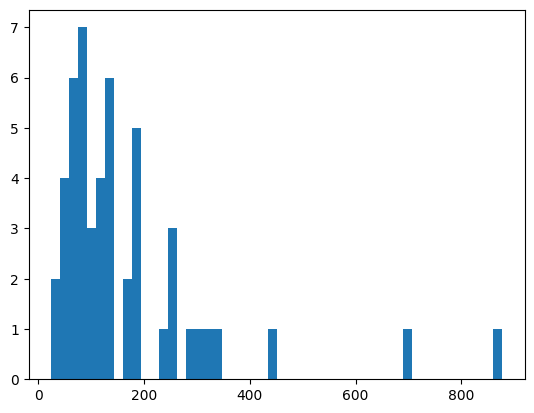

In [5]:
plt.figure()
plt.hist(data[:,1], bins=np.shape(data)[0])
plt.show()

### Séléctionner les artistes qui sont dans l'intervalle représentatif

On remarque que l'écart-type est presque aussi grand que la moyenne. Il y a des artistes avec beaucoup plus de tableaux que d'autres. 
On enlève donc les artistes qui sont sous ou sur représentés. En définissant un seuil de sélection, on peut ainsi conserver les individus ayant un nombre de tableaux autour de la moyenne des tableaux peints et ainsi avoir des artistes avec un nombre similaire de tableaux.

$Moyenne = \frac{\sum_{i=1}^{N_a} N_t(i) }{N_a}$


Où 
* $N_a$ : Nombre d'artistes
*  $N_t(i)$ : Nombre de tableaux pour l'artiste i

In [6]:
mean = np.mean(data[:,1])
sd = np.std(data[:,1])

print(mean,sd)

168.92 155.8686421317643


In [7]:
# On réordonne les data pour qu'elles soient dans le même ordre que les paths 

data_dict = {artist: int(value) for artist, value in data}

artists = [path.split('/')[-1].replace('_', ' ') for path in paths if 'train' not in path]

sorted_data = [[artist, data_dict[artist]] for artist in artists if artist in data_dict]

sorted_data = np.array(sorted_data, dtype=object) 

sorted_data[:, 1] = sorted_data[:, 1].astype(int)

print(sorted_data)

[['Albrecht Dürer' 328]
 ['Alfred Sisley' 259]
 ['Amedeo Modigliani' 193]
 ['Andrei Rublev' 99]
 ['Andy Warhol' 181]
 ['Camille Pissarro' 91]
 ['Caravaggio' 55]
 ['Claude Monet' 73]
 ['Diego Rivera' 70]
 ['Diego Velazquez' 128]
 ['Edgar Degas' 702]
 ['Edouard Manet' 90]
 ['Edvard Munch' 67]
 ['El Greco' 87]
 ['Eugene Delacroix' 31]
 ['Francisco Goya' 291]
 ['Frida Kahlo' 120]
 ['Georges Seurat' 43]
 ['Giotto di Bondone' 119]
 ['Gustav Klimt' 117]
 ['Gustave Courbet' 59]
 ['Henri Matisse' 186]
 ['Henri Rousseau' 70]
 ['Henri de Toulouse-Lautrec' 81]
 ['Hieronymus Bosch' 137]
 ['Jackson Pollock' 24]
 ['Jan van Eyck' 81]
 ['Joan Miro' 102]
 ['Kazimir Malevich' 126]
 ['Leonardo da Vinci' 143]
 ['Marc Chagall' 239]
 ['Michelangelo' 49]
 ['Mikhail Vrubel' 171]
 ['Pablo Picasso' 439]
 ['Paul Cezanne' 47]
 ['Paul Gauguin' 311]
 ['Paul Klee' 188]
 ['Peter Paul Rubens' 141]
 ['Pierre-Auguste Renoir' 336]
 ['Piet Mondrian' 84]
 ['Pieter Bruegel' 134]
 ['Raphael' 109]
 ['Rembrandt' 262]
 ['Rene Ma

On supprime les artistes sous ou sur représentés. On va essayer 3 critères : on gardera d'abord les artistes ayant un nombre de tableaux avec 10, 15 puis 20% d'écart à la moyenne. Cela va nous donner 3, 7 et 11 artistes à classer. 

In [8]:
percentage = 0.2 # nous essayons les pourcentages 0.1 , 0.15 et 0.2 

indices = []
for i in range(np.shape(data)[0]):
    value = sorted_data[i][1]
    if value < mean * (1 - percentage) or value > mean * (1 + percentage):
        indices.append(i)

print("Indices à supprimer :", indices)

Indices à supprimer : [0, 1, 3, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 22, 23, 25, 26, 27, 28, 30, 31, 33, 34, 35, 38, 39, 40, 41, 42, 46, 47, 48, 49]


In [9]:
path_filtered = np.delete(paths,indices,0)
data_filtered = np.delete(sorted_data, indices, axis=0)

print(path_filtered)

['./art-challenge/images_hq/Amedeo_Modigliani'
 './art-challenge/images_hq/Andy_Warhol'
 './art-challenge/images_hq/Henri_Matisse'
 './art-challenge/images_hq/Hieronymus_Bosch'
 './art-challenge/images_hq/Leonardo_da_Vinci'
 './art-challenge/images_hq/Mikhail_Vrubel'
 './art-challenge/images_hq/Paul_Klee'
 './art-challenge/images_hq/Peter_Paul_Rubens'
 './art-challenge/images_hq/Rene_Magritte'
 './art-challenge/images_hq/Salvador_Dali'
 './art-challenge/images_hq/Sandro_Botticelli'
 './art-challenge/images_hq/train' './art-challenge/images_hq/validation'
 './art-challenge/images_hq/test']


In [10]:
artist_filtered = data_filtered[:, 0]
print(artist_filtered)

# Dans le cas de 11 artistes
DATASET_SIZE = np.sum(data_filtered[:, 1])
print('Size',DATASET_SIZE)

['Amedeo Modigliani' 'Andy Warhol' 'Henri Matisse' 'Hieronymus Bosch'
 'Leonardo da Vinci' 'Mikhail Vrubel' 'Paul Klee' 'Peter Paul Rubens'
 'Rene Magritte' 'Salvador Dali' 'Sandro Botticelli']
Size 1837


# Création de liste

Afin de mettre en place nos modèles de machine learning, nous aurons besoin d'échantillons de validation, train et test. 

## Séparer les échantillons en train / test / validation

In [11]:
# Taux d'image dans chaque fichier 
import random
taux_train = 0.7
taux_val = 0.1
taux_test = 0.2 

In [12]:
# Training images
path_train = './art-challenge/images_hq/train/'
path = './art-challenge/images_hq/'
train_dir = os.path.join(path, "train")

# Créer le fichier train 
if not os.path.exists(train_dir):
    os.mkdir(train_dir)

    # Créeer un fichier par artiste 
    for artist in artist_filtered:
        artist_dir = os.path.join(train_dir, artist.replace(' ', '_')) 
        if not os.path.exists(artist_dir):
            os.mkdir(artist_dir)
    
    # Ajouter un dossier train 
    if not os.path.exists(path + "train/train"):
        os.mkdir(path + "train/train")
        
    for artist in artist_filtered:
        artist_path = os.path.join(path, artist.replace(' ', '_'))
        if os.path.exists(artist_path):
            train_filenames_artiste = os.listdir(artist_path)
            
            num_train_files_to_select = int(taux_train * len(train_filenames_artiste))
            selected_train_filenames = random.sample(train_filenames_artiste, num_train_files_to_select)
    
            for filename in selected_train_filenames:
                source_file = os.path.join(artist_path, filename)
                shutil.copyfile(source_file, os.path.join(path_train, "train", filename))
        else:
            print(f"Avertissement : Le chemin '{artist_path}' n'existe pas.")
            
train_filenames = os.listdir(path + "/train/train")

In [13]:
# Validation Images
path_val = './art-challenge/images_hq/validation/'

val_dir = os.path.join(path, "validation")
if not os.path.exists(val_dir):
    os.mkdir(val_dir)

    for artist in artist_filtered:
        artist_path = os.path.join(path, artist.replace(' ', '_'))
        if os.path.exists(artist_path):
            validation_filenames_artiste = os.listdir(artist_path)
    
            # Filtrer les fichiers de validation en excluant ceux de l'entraînement
            validation_filenames_filtered = [f for f in validation_filenames_artiste if f not in train_filenames]
            
            # Sélectionner aléatoirement un certain nombre de fichiers de validation
            num_val_files_to_select = int(taux_val * len(validation_filenames_artiste))
            selected_val_filenames = random.sample(validation_filenames_filtered, num_val_files_to_select)
    
            # Copier les fichiers sélectionnés dans le répertoire de validation
            for filename in selected_val_filenames:
                source_file = os.path.join(artist_path, filename)
                shutil.copyfile(source_file, os.path.join(path_val, filename))
        else:
            print(f"Avertissement : Le chemin '{artist_path}' n'existe pas.")

# Lister les fichiers dans le répertoire de validation
validation_filenames = os.listdir(path_val)

In [14]:
# Test images
path_test = './art-challenge/images_hq/test/'

test_dir = os.path.join(path, "test")
if not os.path.exists(test_dir):
    os.mkdir(test_dir)

    for artist in artist_filtered:
        artist_path = os.path.join(path, artist.replace(' ', '_'))
        if os.path.exists(artist_path):
            test_filenames_artiste = os.listdir(artist_path)
            
            test_filenames_filtered = [f for f in test_filenames_artiste if f not in train_filenames and  f not in validation_filenames]
    
            for filename in test_filenames_filtered:
                source_file = os.path.join(artist_path, filename)
                shutil.copyfile(source_file, os.path.join(path_test, filename))
        else:
            print(f"Avertissement : Le chemin '{artist_path}' n'existe pas.")

test_filenames = os.listdir(path +"test/")

## Créer des catégories pour chaque échantillon 

Pour chaque échantillon, nous allons créer la variable de sortie. A chaque nom d'artiste on associe un numéro afin de pouvoir faire la classification. 

In [15]:
# Créer le Y des catégories 
import re

# Si on considère 10 artistes 
artist_to_category = {
    'Amedeo Modigliani': 0,
    'Andy Warhol': 1,
    'Henri Matisse': 2,
    'Hieronymus Bosch' : 3 ,
    'Leonardo da Vinci': 4,
    'Mikhail Vrubel': 5,
    'Paul Klee': 6,
    'Peter Paul Rubens': 7,
    'Rene Magritte': 8,
    'Salvador Dali': 9,
    'Sandro Botticelli': 10,
}

# Si on considère 3 artistes 
#artist_to_category = {
 #   'Andy Warhol': 0,
  #  'Mikhail Vrubel': 1,
  #  'Sandro Botticelli': 2,
#}

# Liste pour stocker les catégories
if not os.path.exists(path + "train/train"):
    os.mkdir(path + "train/train")
    

train_categories = []
for filename in train_filenames:
    # Extraire le nom de l'artiste à partir du nom de fichier
    artist_name = filename.split('.')[0].replace('_', ' ')  # Remplacer les underscores par des espaces
    # Enlever les entiers
    artist_name = re.sub(r'\d+', '', artist_name).strip()  # Retirer les chiffres et les espaces superflus
    category = artist_to_category.get(artist_name)
    
    if category is not None:
        train_categories.append(category)
    else: 
        print(f"Avertissement : L'artiste '{artist_name}' n'est pas dans le dictionnaire des catégories.")

# Affichage des catégories d'entraînement
print("Catégories d'entraînement :", train_categories)
print("Nombre de catégories de train :", len(train_categories))

Catégories d'entraînement : [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,

In [16]:
# Créer Y pour validation
validation_categories = []

for filename in validation_filenames:
    artist_name = filename.split('.')[0].replace('_', ' ')  
    artist_name = re.sub(r'\d+', '', artist_name).strip()  
    category = artist_to_category.get(artist_name)
    
    if category is not None:
        validation_categories.append(category)
    else: 
        print(f"Avertissement : L'artiste '{artist_name}' n'est pas dans le dictionnaire des catégories.")

# Affichage des catégories d'entraînement
print("Catégories de validation :", validation_categories)
print("Nombre de catégories de validation :", len(validation_categories))

Catégories de validation : [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10]
Nombre de catégories de validation : 179


In [17]:
# Créer Y pour test
test_categories = []

for filename in test_filenames:
    artist_name = filename.split('.')[0].replace('_', ' ')  
    artist_name = re.sub(r'\d+', '', artist_name).strip()  
    category = artist_to_category.get(artist_name)
    
    if category is not None:
        test_categories.append(category)
    else: 
        print(f"Avertissement : L'artiste '{artist_name}' n'est pas dans le dictionnaire des catégories.")

# Affichage des catégories d'entraînement
print("Catégories de test :", test_categories)
print("Nombre de catégories de test :", len(test_categories))

Catégories de test : [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 

### Création des data frame 

In [18]:
# Train images
total_train_df = pd.DataFrame({
    'filename': train_filenames,
    'category': train_categories
})

# Créer le DataFrame pour les données de validation
total_validation_df = pd.DataFrame({
    'filename': validation_filenames,
    'category': validation_categories
})

# Créer le DataFrame pour les données de test
test_df = pd.DataFrame({
    'filename': test_filenames,
    'category': test_categories
})

## Vérification 

#### Echantillons différents dans chaque dossier

Nous voulons nous assurer ici que les datasets ( train/validation/test ), sont bien indépendantes. C'est à dire qu'il n'y ait pas de tableau présent dans deux échantillons à la fois. 

In [19]:
# Vérification des fichiers différents
validation_filenames = set(os.listdir(path + "validation/"))
test_filenames = set(os.listdir(path + "test/"))
train_filenames = set(os.listdir(path + "train/train"))

# Vérifier les intersections
common_train_val = train_filenames.intersection(validation_filenames)
common_train_test = train_filenames.intersection(test_filenames)
common_val_test = validation_filenames.intersection(test_filenames)

if common_train_val:
    print(f"Attention : {len(common_train_val)} fichiers communs entre l'entraînement et la validation ")
else:
    print("Pas de fichiers communs entre l'entraînement et la validation.")

if common_train_test:
    print(f"Attention : {len(common_train_test)} fichiers communs entre l'entraînement et le test ")
else:
    print("Pas de fichiers communs entre l'entraînement et le test.")

if common_val_test:
    print(f"Attention : {len(common_val_test)} fichiers communs entre la validation et le test ")
else:
    print("Pas de fichiers communs entre la validation et le test.")

Pas de fichiers communs entre l'entraînement et la validation.
Pas de fichiers communs entre l'entraînement et le test.
Pas de fichiers communs entre la validation et le test.


#### Taille des échantillons 

In [20]:
total_train_df['category'] = total_train_df['category'].astype(str)
total_validation_df['category'] = total_validation_df['category'].astype(str)
test_df['category'] = test_df['category'].astype(str)

print('Taille des données entraînement:',total_train_df.shape[0])
print('Taille des données de validation:',total_validation_df.shape[0])

print('Nombre de lables : ',test_df.shape[0])

Taille des données entraînement: 1280
Taille des données de validation: 179
Nombre de lables :  378


## Pré-processing 

On pré-traite les données. On normalise chaque pixel pour qu'il appartienne à un intervalle [0,1]. 

In [21]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [22]:
batch_size = 20  
img_width = 150
img_height = 150

train_df = total_train_df
validation_df = total_validation_df

# Training images
train_datagen = ImageDataGenerator(rescale=1./255)
train_generator = train_datagen.flow_from_dataframe(
    train_df,
    path + "train/train/",
    x_col = 'filename',
    y_col = 'category',
    target_size = (img_width, img_height),
    class_mode = 'categorical',
    batch_size = batch_size
)

# Validation images
validation_datagen = ImageDataGenerator(rescale=1./255)
validation_generator = validation_datagen.flow_from_dataframe(
    validation_df,
    path + "validation/",
    x_col = 'filename',
    y_col = 'category',
    class_mode = 'categorical',
    target_size = (img_width, img_height),
    batch_size = batch_size
)

# Test images
test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_dataframe(
    test_df,
    path + "test/",
    x_col = 'filename',
    y_col = 'category',
    class_mode = 'categorical',
    target_size = (img_width, img_height),
    batch_size = batch_size
)

Found 1280 validated image filenames belonging to 11 classes.
Found 179 validated image filenames belonging to 11 classes.
Found 378 validated image filenames belonging to 11 classes.


In [23]:
# Si on considère 10 artistes 
labels= {
   0 : 'Amedeo Modigliani',
    1 :'Andy Warhol',
    2 :'Henri Matisse',
    3: 'Hieronymus Bosch' ,
    4: 'Leonardo da Vinci',
    5 : 'Mikhail Vrubel',
    6: 'Paul Klee',
    7:'Peter Paul Rubens',
    8:'Rene Magritte',
    9:'Salvador Dali',
    10:'Sandro Botticelli',
}

# Si on considère 3 artistes 
#labels= {
#    0 :'Andy Warhol',
#    1 :'Mikhail Vrubel',
#    2: 'Sandro Botticelli',
#}

labels.get(0), labels.get(1)

('Amedeo Modigliani', 'Andy Warhol')

Affichons certains tableaux avec le nom des artistes afin de visualiser les objets manipulés. 

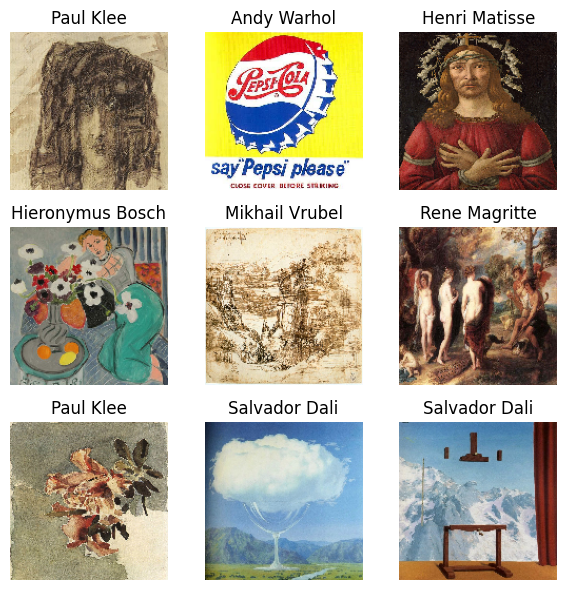

In [24]:
plt.figure(figsize=(6, 6))

num_images = 9

for i in range(num_images):
    plt.subplot(3, 3, i + 1)
    for x_batch, y_batch in train_generator:
        plt.imshow(x_batch[0])  
        label_index = np.argmax(y_batch[0]) if y_batch.ndim > 1 else y_batch[0]
        plt.title(labels.get(label_index)) 
        plt.axis('off')  
        break 

plt.tight_layout()
plt.show()

# Réseaux de convolution

### Réseau inital 

#### Initialisation

- Dans un premier temps, nous faisons une analyse avec un premier réseau simple et un nombre d'époques restreint (epochs = 10) afin d'étudier la différence entre le choix du nombre d'artistes et de comparer l'utilisation d'un modèle simple à celle d'un modèle plus complexe. Nous chercherons à améliorer ce réseau à l'aide différentes méthodes. 
- Dans un second temps, nous faisons uniquement l'analyse des 11 artistes. Ceux-ci ont des résultats plus faibles que nous cherchons à améliorer. On tente d'ajouter des couches de dropout au réseau simple initial afin de diminuer le sur-apprentissage, on ajoute des couches de convolution pour améliorer les performances du modèle et étudions le choix du nombre d'époques. 

In [ ]:
#### Réseau initial simple : 

#k = np.shape(artist_filtered)[0]

#cnn_init = Sequential()
#cnn_init.add(Input(shape=(150,150, 3)))

#cnn_init.add(Conv2D(32, kernel_size=(3, 3), activation='relu'))
#cnn_init.add(MaxPooling2D(pool_size=(2, 2)))

#cnn_init.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
#cnn_init.add(MaxPooling2D(pool_size=(2, 2)))

#cnn_init.add(Conv2D(96, kernel_size=(3, 3), activation='relu'))
#cnn_init.add(MaxPooling2D(pool_size=(2, 2)))

#cnn_init.add(Flatten())
#cnn_init.add(Dense(64, activation='relu'))
#cnn_init.add(Dropout(0.5))
#cnn_init.add(Dense(k, activation='softmax'))

#cnn_init.summary()

In [57]:
## Réseau plus complexe

k = 11

cnn_init = Sequential()
cnn_init.add(Input(shape=(150,150, 3)))

cnn_init.add(Conv2D(32, kernel_size=(3, 3), activation='relu'))
cnn_init.add(MaxPooling2D(pool_size=(2, 2)))
cnn_init.add(Dropout(0.2))

cnn_init.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
cnn_init.add(MaxPooling2D(pool_size=(2, 2)))
cnn_init.add(Dropout(0.2))

cnn_init.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
cnn_init.add(MaxPooling2D(pool_size=(2, 2)))
cnn_init.add(Dropout(0.2))

cnn_init.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
cnn_init.add(MaxPooling2D(pool_size=(2, 2)))
cnn_init.add(Dropout(0.2))

cnn_init.add(Conv2D(256, kernel_size=(3, 3), activation='relu'))
cnn_init.add(MaxPooling2D(pool_size=(2, 2)))
cnn_init.add(Dropout(0.2))

# Couche de mise à plat
cnn_init.add(Flatten())

# Couche dense 
cnn_init.add(Dense(128, activation='relu'))
cnn_init.add(Dropout(0.5))

# Couche de sortie
cnn_init.add(Dense(k, activation='softmax'))

cnn_init.summary()


Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_22 (Conv2D)              │ (None, 148, 148, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_22 (MaxPooling2D) │ (None, 74, 74, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_21 (Dropout)            │ (None, 74, 74, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_23 (Conv2D)              │ (None, 72, 72, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_23 (MaxPooling2D) │ (None, 36, 36, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_22 (Dropout)            │ (None, 36, 36, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_24 (Conv2D)              │ (None, 34, 34, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_24 (MaxPooling2D) │ (None, 17, 17, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_23 (Dropout)            │ (None, 17, 17, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_25 (Conv2D)              │ (None, 15, 15, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_25 (MaxPooling2D) │ (None, 7, 7, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_24 (Dropout)            │ (None, 7, 7, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_26 (Conv2D)              │ (None, 5, 5, 256)      │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_26 (MaxPooling2D) │ (None, 2, 2, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_25 (Dropout)            │ (None, 2, 2, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_6 (Flatten)             │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 128)            │       131,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_26 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 11)             │         1,419 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 668,619 (2.55 MB)

 Trainable params: 668,619 (2.55 MB)

 Non-trainable params: 0 (0.00 B)

#### Entrainement 

In [58]:
epochs = 30

cnn_init.compile(
    loss='categorical_crossentropy',  # Utiliser 'categorical_crossentropy' pour plusieurs classes
    optimizer=Adam(learning_rate=3e-4),
    metrics=['accuracy']
)


# Enregistrer le temps d'apprentissage
t_learning_cnn_init = time.time()

# Entraîner le modèle
cnn_init_history = cnn_init.fit(
    train_generator,
    validation_data=validation_generator,
    epochs=epochs
)

# Calculer le temps écoulé
t_learning_cnn_init = time.time() - t_learning_cnn_init

print("Learning time for %d epochs : %.2f seconds" % (epochs, t_learning_cnn_init))

Epoch 1/30
 3/64 ━━━━━━━━━━━━━━━━━━━━ 3s 49ms/step - accuracy: 0.1111 - loss: 2.4564

2024-12-17 11:48:27.994243: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:393] ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_7', 4 bytes spill stores, 12 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_6', 4 bytes spill stores, 12 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_5', 4 bytes spill stores, 12 bytes spill loads



64/64 ━━━━━━━━━━━━━━━━━━━━ 18s 142ms/step - accuracy: 0.1027 - loss: 2.4104 - val_accuracy: 0.1508 - val_loss: 2.3853
Epoch 2/30
64/64 ━━━━━━━━━━━━━━━━━━━━ 9s 128ms/step - accuracy: 0.1101 - loss: 2.3718 - val_accuracy: 0.1564 - val_loss: 2.3003
Epoch 3/30
64/64 ━━━━━━━━━━━━━━━━━━━━ 9s 125ms/step - accuracy: 0.1453 - loss: 2.3073 - val_accuracy: 0.1844 - val_loss: 2.2263
Epoch 4/30
64/64 ━━━━━━━━━━━━━━━━━━━━ 9s 128ms/step - accuracy: 0.1990 - loss: 2.2165 - val_accuracy: 0.2849 - val_loss: 2.1937
Epoch 5/30
64/64 ━━━━━━━━━━━━━━━━━━━━ 9s 129ms/step - accuracy: 0.1799 - loss: 2.1722 - val_accuracy: 0.2793 - val_loss: 2.1487
Epoch 6/30
64/64 ━━━━━━━━━━━━━━━━━━━━ 9s 127ms/step - accuracy: 0.2326 - loss: 2.1548 - val_accuracy: 0.2626 - val_loss: 2.1263
Epoch 7/30
64/64 ━━━━━━━━━━━━━━━━━━━━ 9s 126ms/step - accuracy: 0.2790 - loss: 2.0573 - val_accuracy: 0.2346 - val_loss: 2.1281
Epoch 8/30
64/64 ━━━━━━━━━━━━━━━━━━━━ 9s 125ms/step - accuracy: 0.2505 - loss: 2.0759 - val_accuracy: 0.3352 - val

### Résultats 

In [59]:
def plot_training_analysis(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']

    epochs = range(len(acc))

    plt.subplot(1,2,1)
    plt.plot(epochs, acc, 'b', linestyle="--",label='Training accuracy')
    plt.plot(epochs, val_acc, 'g', label='Validation accuracy')
    plt.title('Training and validation accuracy')
    plt.legend()

    plt.subplot(1,2,2)
    plt.plot(epochs, loss, 'b', linestyle="--",label='Training loss')
    plt.plot(epochs, val_loss,'g', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()

    plt.tight_layout()
    plt.show()

64/64 ━━━━━━━━━━━━━━━━━━━━ 8s 119ms/step - accuracy: 0.6953 - loss: 1.0192
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 136ms/step - accuracy: 0.5630 - loss: 1.3688
Train accuracy: 0.7046874761581421
Validation accuracy: 0.5083798766136169
Time Prediction: 9.41 seconds


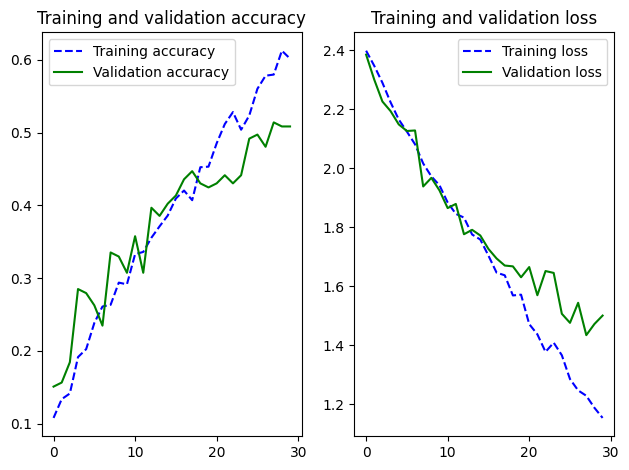

In [60]:
t_prediction_cnn_init  = time.time()

score_cnn_train = cnn_init.evaluate(train_generator, verbose=1)
score_cnn_validation = cnn_init.evaluate(validation_generator, verbose=1)

t_prediction_cnn_init= time.time() - t_prediction_cnn_init

print('Train accuracy:', score_cnn_train[1])
print('Validation accuracy:', score_cnn_validation[1])
print("Time Prediction: %.2f seconds" % t_prediction_cnn_init )

plot_training_analysis(cnn_init_history)

- Nous avons bien un réseau avec peu de sur-apprentissage, l'accuracy est uniquement de 50%. En mettant plus de poids sur les couches de dropout, nous passons à 40% d'accuracy  mais avons moins de sur-apprentissage. En en mettant moins nous gagnons en accuracy mais avons beaucoup de sur-apprentissage. 
- En choissisant 10 époques, la loss ne converge pas. Au bout de 50 époques la loss d'entraînenent converge mais celle de validation s'arrête de progresser à 30 époques. Cela induit du sur-apprentissage après 30 époques. Afin d'éviter ce phénomène, nous allons donc traviller avec 30 époques.
- Nous choisissons donc ce compromis mais l'accuracy est encore insatisfaisante.

In [31]:
from IPython.display import Image, display

#### Résultats selon nombre d'artistes

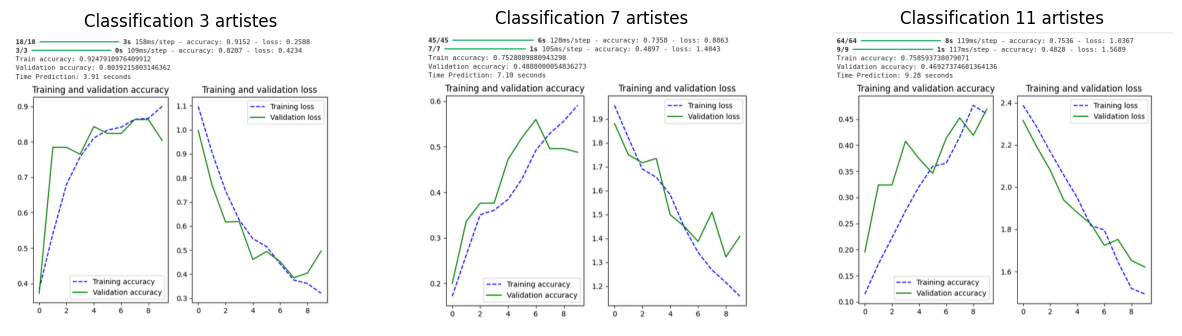

In [32]:
img3 = mpimg.imread('./init_01.png')
img7 = mpimg.imread('./init_015.png')
img11 = mpimg.imread('./init_020.png')

fig, ax = plt.subplots(1, 3, figsize=(15, 6)) 

ax[0].imshow(img3)
ax[0].axis('off')  
ax[0].set_title("Classification 3 artistes") 

ax[1].imshow(img7)
ax[1].axis('off') 
ax[1].set_title("Classification 7 artistes")

ax[2].imshow(img11)
ax[2].axis('off')
ax[2].set_title("Classification 11 artistes") 

plt.show()

- Pour ce réseau, on observe bien que le modèle apprend bien. De plus, on remarque que lorsque l'on restreint plus le nombre d'artistes à reconnaitre, les performances sont meilleures. On tente tout de même d'améliorer la précision de nos résultats en utilisant un modèle VGG pré-entraîné.
- Le modèle plus complexe permet de gagner près de 5% de précision pour la validation. 

# Modèle VGG

<center><img src="https://www.researchgate.net/publication/340520821/figure/fig3/AS:1156538702004230@1652751722566/VGG-net-deep-learning-network-structure.png" style="height:200px;"></center>
<caption><center><b> VGG-16 </b></center></caption>

Nous allons utiliser ici l'architecture du modèle VGG-16 pour améliorer la précision des modèles précédents. La succession de couches de convolution et de pooling permet au VGG-16 de créer plusieurs espaces latents et ainsi extraire des features à différentes échelles des images ce qui permet une compréhension accrue des images.

## VGG pré-entrainé

### Récupération de l'architecture

In [42]:
from tensorflow.keras.applications import VGG16

In [61]:
conv_base = VGG16(
    weights = 'imagenet', 
    include_top = False,  # On ré-entraine pas la couche dense
    input_shape = (img_width, img_height, 3)
)

conv_base.summary()

Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_9 (InputLayer)      │ (None, 150, 150, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 150, 150, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 150, 150, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 75, 75, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 75, 75, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 75, 75, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 37, 37, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 37, 37, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 37, 37, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 37, 37, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 18, 18, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 18, 18, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 18, 18, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 18, 18, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 9, 9, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 9, 9, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 9, 9, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 9, 9, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 4, 4, 512)      │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,714,688 (56.13 MB)

 Trainable params: 14,714,688 (56.13 MB)

 Non-trainable params: 0 (0.00 B)

Nous avons ici récupéré seulement les blocks de convolution et de pooling (en gris et en rouge sur le schéma ci-dessus). Nous avons également récupéré les poids déjà entraîné sur la base de données imagenet, qui est utilisée pour la classification d'image.

In [62]:
train_features = conv_base.predict(train_generator)
train_features = np.reshape(train_features,(train_features.shape[0], -1))

validation_features = conv_base.predict(validation_generator)
validation_features = np.reshape(validation_features,(validation_features.shape[0], -1))

64/64 ━━━━━━━━━━━━━━━━━━━━ 8s 120ms/step
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 160ms/step


#### Ajustement VGG

In [63]:
train_data = train_df.to_numpy()
y_train = np.array([int(numeric_string) for numeric_string in train_data[:,1]])

validation_data = validation_df.to_numpy()
y_validation = np.array([int(numeric_string) for numeric_string in validation_data[:,1]])

In [64]:
from keras.utils import to_categorical

y_train = to_categorical(y_train, num_classes=k)
y_validation = to_categorical(y_validation, num_classes=k)

Maintenant que la partie convolutionnelle du VGG est en place, il faut rajouter un classifieur adapté à notre situation (le bon nombres de classe pour le bon nombre d'artistes = k)

#### Ajout du classifieur à VGG 

In [65]:
vgg_mlp = Sequential()
vgg_mlp.add(Input((train_features.shape[1],)))
vgg_mlp.add(Dense(256, activation='relu'))
vgg_mlp.add(Dropout(0.5))
vgg_mlp.add(Dense(k, activation='softmax'))

vgg_mlp.summary()

Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_16 (Dense)                │ (None, 256)            │     2,097,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_27 (Dropout)            │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 11)             │         2,827 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,100,235 (8.01 MB)

 Trainable params: 2,100,235 (8.01 MB)

 Non-trainable params: 0 (0.00 B)

### Entrainement 

In [66]:
epochs = 30

vgg_mlp.compile(
    loss = 'categorical_crossentropy',
    optimizer = Adam(learning_rate=3e-4),
    metrics = ['accuracy']
)

t_learning_vgg_mlp = time.time()
vgg_mlp_history = vgg_mlp.fit(
    train_features, y_train,
    validation_data = (validation_features, y_validation),
    epochs = epochs
)
t_learning_vgg_mlp = time.time() - t_learning_vgg_mlp

print("Learning time for %d epochs : %d seconds" % (epochs, t_learning_vgg_mlp))

Epoch 1/30
40/40 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - accuracy: 0.0800 - loss: 2.6769 - val_accuracy: 0.0950 - val_loss: 2.4305
Epoch 2/30
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.1261 - loss: 2.3410 - val_accuracy: 0.0838 - val_loss: 2.4499
Epoch 3/30
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.1749 - loss: 2.2787 - val_accuracy: 0.0670 - val_loss: 2.4785
Epoch 4/30
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2646 - loss: 2.1707 - val_accuracy: 0.0950 - val_loss: 2.4679
Epoch 5/30
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2836 - loss: 2.0989 - val_accuracy: 0.0894 - val_loss: 2.5311
Epoch 6/30
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3182 - loss: 2.0130 - val_accuracy: 0.0782 - val_loss: 2.5424
Epoch 7/30
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3881 - loss: 1.8680 - val_accuracy: 0.0782 - val_loss: 2.5562
Epoch 8/30
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4261 - loss: 1.7749 - val_accuracy: 0.0615 - val_loss

### Résulats 

40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9960 - loss: 0.1546
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.0803 - loss: 3.3812 
Train accuracy: 0.9984375238418579
Validation accuracy: 0.10614524781703949
Time Prediction: 0.35 seconds


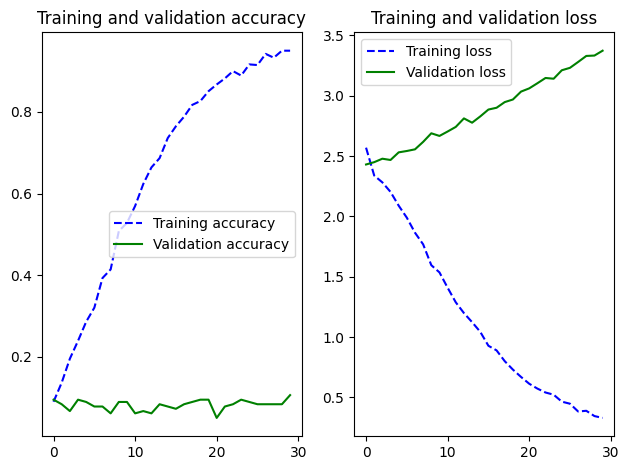

In [67]:
t_prediction_vgg_mlp = time.time()

score_vgg_mlp_train = vgg_mlp.evaluate(train_features, y_train)
score_vgg_mlp_validation = vgg_mlp.evaluate(validation_features, y_validation)

t_prediction_vgg_mlp = time.time() - t_prediction_vgg_mlp

print('Train accuracy:', score_vgg_mlp_train[1])
print('Validation accuracy:', score_vgg_mlp_validation[1])
print("Time Prediction: %.2f seconds" % t_prediction_vgg_mlp )

plot_training_analysis(vgg_mlp_history)

- L'ajout du modèle VGG améliore fortement la précison d'entrainement mais celle de validation est drastiquement détériorée. Un fort sur-apprntissage apparaît, la généralisation est minime. 

#### Comparaison selon nombre d'artistes

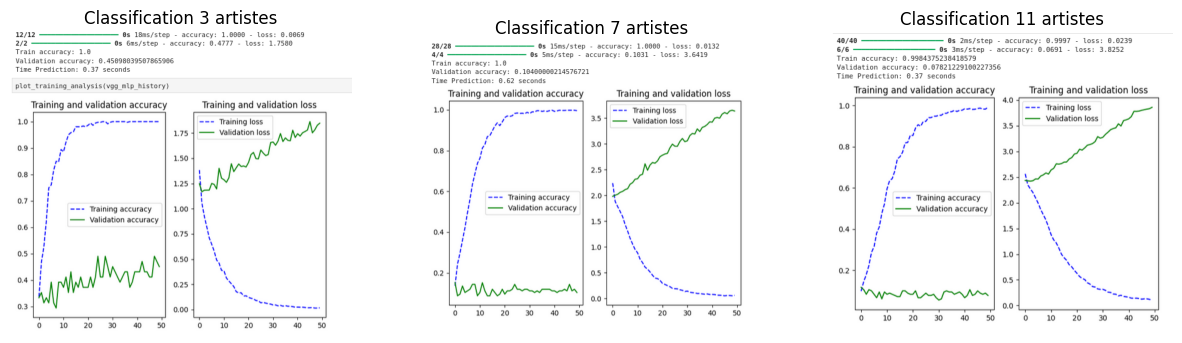

In [68]:
img3 = mpimg.imread('./vgg_01.png')
img7 = mpimg.imread('./vgg_015.png')
img11 = mpimg.imread('./vgg_020.png')

fig, ax = plt.subplots(1, 3, figsize=(15, 6)) 

ax[0].imshow(img3)
ax[0].axis('off')  
ax[0].set_title("Classification 3 artistes") 

ax[1].imshow(img7)
ax[1].axis('off') 
ax[1].set_title("Classification 7 artistes")

ax[2].imshow(img11)
ax[2].axis('off')
ax[2].set_title("Classification 11 artistes") 

plt.show()

- De la même façon pour tous les différents nombres d'artistes, le VGG-16 pré entrainé ne permet pas d'améliorer significativement la précision de classification en plus d'ajouter du surapprentissage. Pour palier à ce problème nous allons donc essayer de combiner le modèle avec de la data augmentation. 

## Data augmentation

Lorsque l'on fait face à un problème d'overfitting, une solution est d'utiliser la data augmentation. Ce processus permet d'agrandir artificiellement le jeu de données en fournissant des versions altérées des images initialement présentes. Ces images modifiées offrent donc plus de robustesse dans l'apprentissage car elles permettent au réseau de ne pas apprendre des motifs trop particulier mais plutôt de s'efforcer sur le travail de généralisation.



<center><img src="https://miro.medium.com/v2/resize:fit:828/format:webp/0*LR1ZQucYW96prDte" style="height:200px;"></center>
<caption><center><b> Data augmentation </b></center></caption>

### Jeu de données augmentées

In [69]:
train_datagen_augmented = ImageDataGenerator(
    rotation_range = 40,
    rescale = 1./255,
    width_shift_range = 0.2,
    height_shift_range = 0.2,
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True,
    fill_mode='nearest'
)

train_generator_augmented = train_datagen_augmented.flow_from_dataframe(
    train_df,
    path + 'train/train/',
    x_col ='filename',
    y_col ='category',
    target_size=(img_width,img_height),
    class_mode = 'categorical',
    batch_size = batch_size
)

Found 1280 validated image filenames belonging to 11 classes.


### Entrainement 

In [70]:
vgg_combined = Sequential()
vgg_combined.add(Input(shape=(img_width, img_height, 3)))
vgg_combined.add(conv_base)
vgg_combined.add(Flatten())
vgg_combined.add(Dense(256, activation='relu'))
vgg_combined.add(Dense(k, activation='sigmoid'))

vgg_combined.summary()

Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ vgg16 (Functional)              │ (None, 4, 4, 512)      │    14,714,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_7 (Flatten)             │ (None, 8192)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 256)            │     2,097,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ (None, 11)             │         2,827 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 16,814,923 (64.14 MB)

 Trainable params: 16,814,923 (64.14 MB)

 Non-trainable params: 0 (0.00 B)

In [71]:
conv_base.trainable = False
vgg_combined.summary()

Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ vgg16 (Functional)              │ (None, 4, 4, 512)      │    14,714,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_7 (Flatten)             │ (None, 8192)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 256)            │     2,097,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ (None, 11)             │         2,827 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 16,814,923 (64.14 MB)

 Trainable params: 2,100,235 (8.01 MB)

 Non-trainable params: 14,714,688 (56.13 MB)

In [72]:
epochs = 30

vgg_combined.compile(
    loss = 'categorical_crossentropy',
    optimizer = Adam(learning_rate=3e-4),
    metrics = ['accuracy']
)

t_learning_vgg_combined = time.time()
vgg_combined_history = vgg_combined.fit(
    train_generator_augmented,
    validation_data = validation_generator,
    epochs = epochs
)
t_learning_vgg_combined = time.time() - t_learning_vgg_combined

print("Learning time for %d epochs : %d seconds" % (epochs, t_learning_vgg_combined))

Epoch 1/30


/home/misselis/.conda/envs/tensorflow/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


64/64 ━━━━━━━━━━━━━━━━━━━━ 18s 228ms/step - accuracy: 0.2654 - loss: 2.1838 - val_accuracy: 0.5196 - val_loss: 1.5209
Epoch 2/30
64/64 ━━━━━━━━━━━━━━━━━━━━ 15s 202ms/step - accuracy: 0.5064 - loss: 1.4930 - val_accuracy: 0.5642 - val_loss: 1.3545
Epoch 3/30
64/64 ━━━━━━━━━━━━━━━━━━━━ 14s 201ms/step - accuracy: 0.5979 - loss: 1.2551 - val_accuracy: 0.5922 - val_loss: 1.3228
Epoch 4/30
64/64 ━━━━━━━━━━━━━━━━━━━━ 15s 206ms/step - accuracy: 0.6287 - loss: 1.1182 - val_accuracy: 0.6480 - val_loss: 1.2383
Epoch 5/30
64/64 ━━━━━━━━━━━━━━━━━━━━ 15s 204ms/step - accuracy: 0.6641 - loss: 1.0761 - val_accuracy: 0.6816 - val_loss: 1.1889
Epoch 6/30
64/64 ━━━━━━━━━━━━━━━━━━━━ 14s 201ms/step - accuracy: 0.6965 - loss: 0.9717 - val_accuracy: 0.5978 - val_loss: 1.2161
Epoch 7/30
64/64 ━━━━━━━━━━━━━━━━━━━━ 14s 203ms/step - accuracy: 0.7011 - loss: 0.9462 - val_accuracy: 0.6257 - val_loss: 1.3038
Epoch 8/30
64/64 ━━━━━━━━━━━━━━━━━━━━ 14s 198ms/step - accuracy: 0.7146 - loss: 0.9132 - val_accuracy: 0.670

### Résultats

64/64 ━━━━━━━━━━━━━━━━━━━━ 13s 202ms/step - accuracy: 0.8603 - loss: 0.4485
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 122ms/step - accuracy: 0.6801 - loss: 1.1394
Train accuracy: 0.854687511920929
Validation accuracy: 0.6703910827636719
Time Prediction: 14.83 seconds


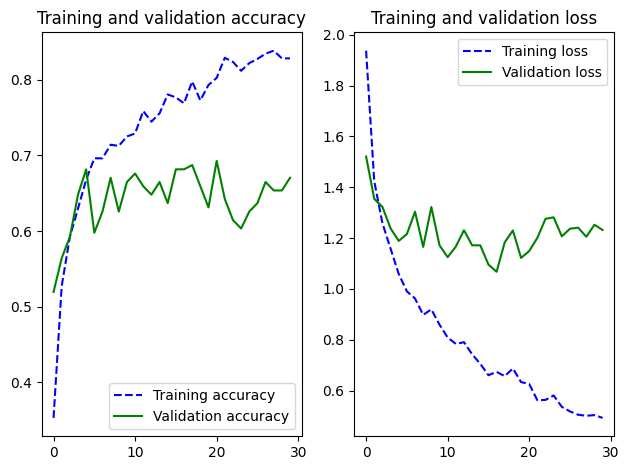

In [73]:
t_prediction_vgg_combined = time.time()

score_vgg_combined_train = vgg_combined.evaluate(train_generator_augmented)
score_vgg_combined_validation = vgg_combined.evaluate(validation_generator)

t_prediction_vgg_combined = time.time() - t_prediction_vgg_combined

print('Train accuracy:', score_vgg_combined_train[1])
print('Validation accuracy:', score_vgg_combined_validation[1])
print("Time Prediction: %.2f seconds" % t_prediction_vgg_combined )

plot_training_analysis(vgg_combined_history)

- Nous avons ici réglé une partie du problème de sur-apprentissage précédent et nous avons atteint une précision de presque 70%. 

#### Comparaison selon nombre d'artistes

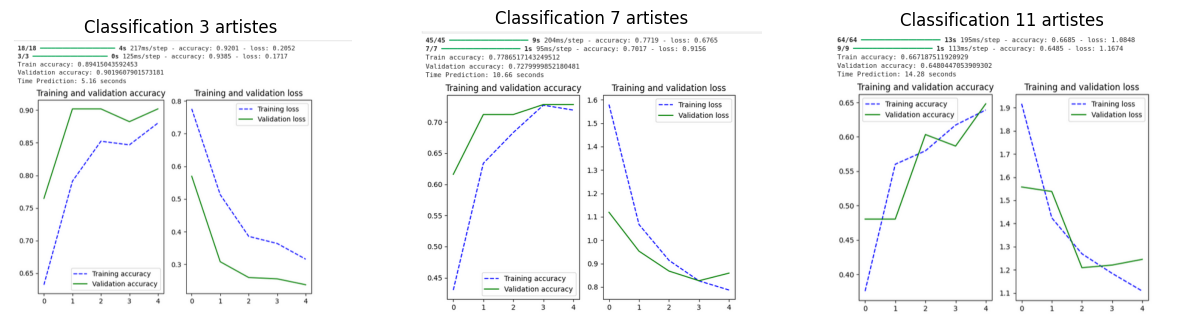

In [74]:
img3 = mpimg.imread('./augmentation_01.png')
img7 = mpimg.imread('./augmentation_015.png')
img11 = mpimg.imread('./augmentation_020.png')

fig, ax = plt.subplots(1, 3, figsize=(15, 6)) 

ax[0].imshow(img3)
ax[0].axis('off')  
ax[0].set_title("Classification 3 artistes") 

ax[1].imshow(img7)
ax[1].axis('off') 
ax[1].set_title("Classification 7 artistes")

ax[2].imshow(img11)
ax[2].axis('off')
ax[2].set_title("Classification 11 artistes") 

plt.show()

- Nous avons ici réussi à améliorer l'accuracy de notre modèle initial et à enlever le sur-aprentissage apporté par l'ajout de VGG-16. Nous pourrions nous arréter là pour la base de données classifiant 3 artistes où l'on atteint déjà 90% de précision.
- Les résultat du modèle simple pour 11 artistes sont similaires à ceux du modèle plus complexe. 

Pour continuer à améliorer les autres modèles, nous allons mettre en place du fine tuning. Cette méthode consiste à remettre en entrainement le dernier block de convolution du VGG-16, jusqu'à present fixé via les poids d'imagenet. Cela va permettre au modèle de créer un espace latent plus spécifique au problème de reconnaissance d'artistes.

## Fine tuning

In [75]:
conv_base.trainable = True

for layer in conv_base.layers[:15]:
    layer.trainable = False

vgg_combined.summary()

Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ vgg16 (Functional)              │ (None, 4, 4, 512)      │    14,714,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_7 (Flatten)             │ (None, 8192)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 256)            │     2,097,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ (None, 11)             │         2,827 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 21,015,395 (80.17 MB)

 Trainable params: 9,179,659 (35.02 MB)

 Non-trainable params: 7,635,264 (29.13 MB)

 Optimizer params: 4,200,472 (16.02 MB)

### Entrainement

In [76]:
epochs = 30

vgg_combined.compile(
    loss = 'categorical_crossentropy',
    optimizer = Adam(learning_rate=1e-4), # Reduced learning rates to avoid smashing everything and risking overfitting
    metrics = ['accuracy']
)

t_learning_vgg_combined_tuned = time.time()
vgg_combined_tuned_history = vgg_combined.fit(
    train_generator_augmented,
    validation_data = validation_generator,
    epochs = epochs
)
t_learning_vgg_combined_tuned = time.time() - t_learning_vgg_combined_tuned

print("Learning time for %d epochs : %d seconds" % (epochs, t_learning_vgg_combined_tuned))

Epoch 1/30
64/64 ━━━━━━━━━━━━━━━━━━━━ 18s 212ms/step - accuracy: 0.6797 - loss: 0.9629 - val_accuracy: 0.5922 - val_loss: 1.3589
Epoch 2/30
64/64 ━━━━━━━━━━━━━━━━━━━━ 15s 205ms/step - accuracy: 0.7906 - loss: 0.6436 - val_accuracy: 0.5810 - val_loss: 1.4465
Epoch 3/30
64/64 ━━━━━━━━━━━━━━━━━━━━ 15s 213ms/step - accuracy: 0.8066 - loss: 0.6055 - val_accuracy: 0.5754 - val_loss: 1.4174
Epoch 4/30
64/64 ━━━━━━━━━━━━━━━━━━━━ 15s 204ms/step - accuracy: 0.8290 - loss: 0.5130 - val_accuracy: 0.6872 - val_loss: 1.2337
Epoch 5/30
64/64 ━━━━━━━━━━━━━━━━━━━━ 14s 202ms/step - accuracy: 0.8841 - loss: 0.3522 - val_accuracy: 0.6257 - val_loss: 1.5905
Epoch 6/30
64/64 ━━━━━━━━━━━━━━━━━━━━ 14s 200ms/step - accuracy: 0.8820 - loss: 0.3651 - val_accuracy: 0.7095 - val_loss: 1.2345
Epoch 7/30
64/64 ━━━━━━━━━━━━━━━━━━━━ 14s 204ms/step - accuracy: 0.8927 - loss: 0.3321 - val_accuracy: 0.6425 - val_loss: 1.5493
Epoch 8/30
64/64 ━━━━━━━━━━━━━━━━━━━━ 14s 200ms/step - accuracy: 0.9386 - loss: 0.2180 - val_accu

### Résultats

64/64 ━━━━━━━━━━━━━━━━━━━━ 13s 196ms/step - accuracy: 0.9411 - loss: 0.1874
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 124ms/step - accuracy: 0.7334 - loss: 1.7087
Train accuracy: 0.946093738079071
Validation accuracy: 0.7206704020500183
Time Prediction: 14.44 seconds


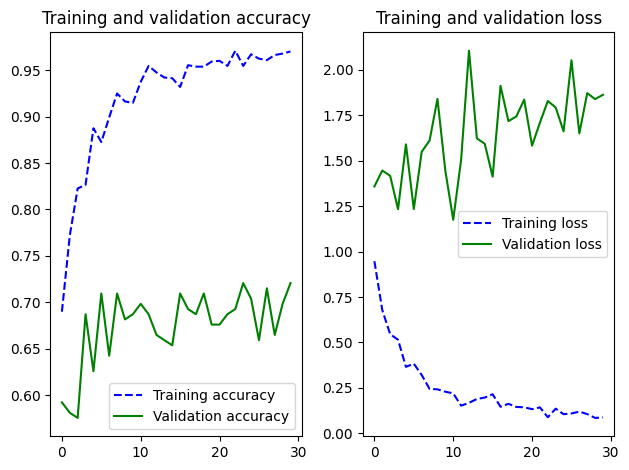

In [77]:
t_prediction_vgg_combined_tuned = time.time()

score_vgg_combined_tuned_train = vgg_combined.evaluate(train_generator_augmented)
score_vgg_combined_tuned_validation = vgg_combined.evaluate(validation_generator)

t_prediction_vgg_combined_tuned = time.time() - t_prediction_vgg_combined_tuned

print('Train accuracy:', score_vgg_combined_tuned_train[1])
print('Validation accuracy:', score_vgg_combined_tuned_validation[1])
print("Time Prediction: %.2f seconds" % t_prediction_vgg_combined_tuned )

plot_training_analysis(vgg_combined_tuned_history)

- Nous ne parvenons pas à améliorer l'accuracy de validation. Cela entraîne donc davantage de sur-apprentissage. Il ne semble donc pas pertinent d'utiliser du fine-tuning dans cette situation. 

#### Comparaison selon nombre d'artistes

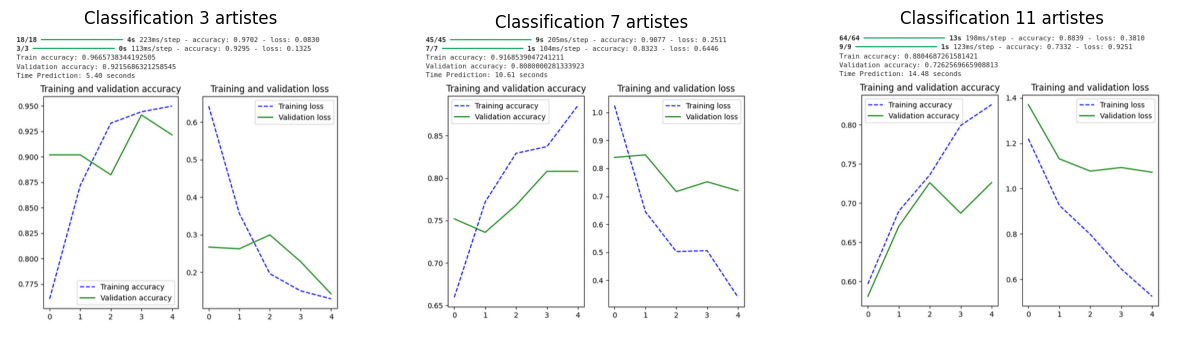

In [78]:
img3 = mpimg.imread('./fine_tun_01.png')
img7 = mpimg.imread('./fine_tun_015.png')
img11 = mpimg.imread('./fine_tun_020.png')

fig, ax = plt.subplots(1, 3, figsize=(15, 6)) 

ax[0].imshow(img3)
ax[0].axis('off')  
ax[0].set_title("Classification 3 artistes") 

ax[1].imshow(img7)
ax[1].axis('off') 
ax[1].set_title("Classification 7 artistes")

ax[2].imshow(img11)
ax[2].axis('off')
ax[2].set_title("Classification 11 artistes") 

plt.show()

- Nous avons bien amélioré la précison du modèle mais on voit apparaître du sur-apprentissage pour les bases de données de 7 ou 11 artistes.

Pour régler une fois de plus le problème de sur-apprentissage, nous allons utiliser une base de données augmentée. 

## Overfitting correction (data augmentation)

### Entrainement

In [79]:
epochs = 30

vgg_combined.compile(
    loss = 'categorical_crossentropy',
    optimizer = Adam(learning_rate=3e-4),
    metrics = ['accuracy']
)

cnn_simple_augmented_history = vgg_combined.fit(
    train_generator_augmented,
    validation_data = validation_generator,
    epochs = epochs
)

Epoch 1/30
64/64 ━━━━━━━━━━━━━━━━━━━━ 18s 214ms/step - accuracy: 0.8018 - loss: 0.6804 - val_accuracy: 0.6983 - val_loss: 1.5097
Epoch 2/30
64/64 ━━━━━━━━━━━━━━━━━━━━ 15s 208ms/step - accuracy: 0.8456 - loss: 0.4942 - val_accuracy: 0.6369 - val_loss: 1.6444
Epoch 3/30
64/64 ━━━━━━━━━━━━━━━━━━━━ 15s 207ms/step - accuracy: 0.8580 - loss: 0.4600 - val_accuracy: 0.6089 - val_loss: 1.8724
Epoch 4/30
64/64 ━━━━━━━━━━━━━━━━━━━━ 14s 202ms/step - accuracy: 0.8540 - loss: 0.4716 - val_accuracy: 0.6145 - val_loss: 1.6481
Epoch 5/30
64/64 ━━━━━━━━━━━━━━━━━━━━ 15s 206ms/step - accuracy: 0.8913 - loss: 0.3602 - val_accuracy: 0.7151 - val_loss: 1.6908
Epoch 6/30
64/64 ━━━━━━━━━━━━━━━━━━━━ 15s 205ms/step - accuracy: 0.8841 - loss: 0.3753 - val_accuracy: 0.7151 - val_loss: 1.6337
Epoch 7/30
64/64 ━━━━━━━━━━━━━━━━━━━━ 15s 206ms/step - accuracy: 0.8894 - loss: 0.3281 - val_accuracy: 0.6592 - val_loss: 1.7952
Epoch 8/30
64/64 ━━━━━━━━━━━━━━━━━━━━ 15s 217ms/step - accuracy: 0.8801 - loss: 0.3152 - val_accu

### Résultats

64/64 ━━━━━━━━━━━━━━━━━━━━ 8s 117ms/step - accuracy: 0.9435 - loss: 0.0981
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 113ms/step - accuracy: 0.6801 - loss: 2.4684
Train accuracy: 0.953125
Validation accuracy: 0.6871508359909058
Time Prediction: 9.15 seconds


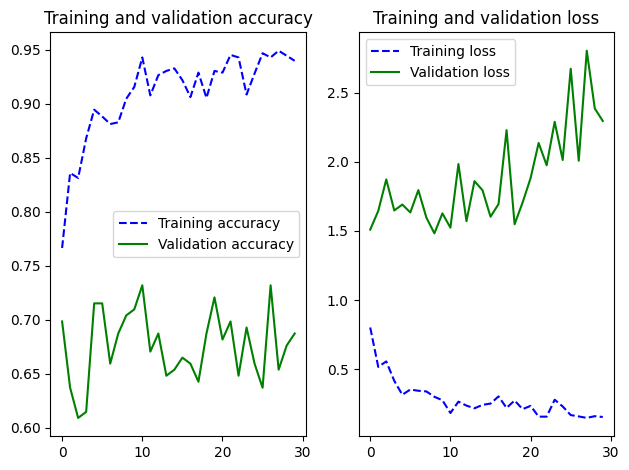

In [80]:
t_prediction_vgg_combined_augmented = time.time()

score_vgg_combined_train_augmented = vgg_combined.evaluate(train_generator, verbose=1)
score_vgg_combined_validation_augmented = vgg_combined.evaluate(validation_generator, verbose=1)

t_prediction_vgg_combined_augmented = time.time() - t_prediction_vgg_combined_augmented

print('Train accuracy:', score_vgg_combined_train_augmented[1])
print('Validation accuracy:', score_vgg_combined_validation_augmented[1])
print("Time Prediction: %.2f seconds" % t_prediction_vgg_combined_augmented )

plot_training_analysis(cnn_simple_augmented_history)

- L'overfitting n'est pas corrigé. Il semble donc dans cette situation plus pertinent de garder le modèle avant fine tuning. 

#### Comparaison selon nombre d'artistes

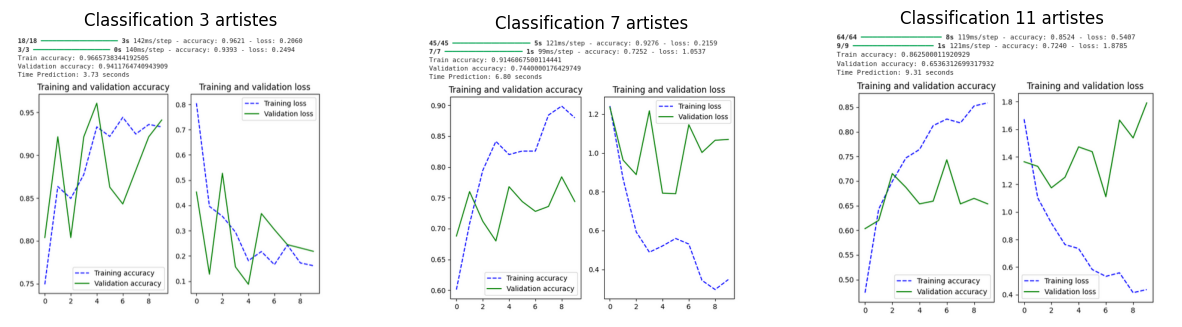

In [81]:
img3 = mpimg.imread('./over_fit_01.png')
img7 = mpimg.imread('./over_fit_015.png')
img11 = mpimg.imread('./over_fit_020.png')

fig, ax = plt.subplots(1, 3, figsize=(15, 6)) 

ax[0].imshow(img3)
ax[0].axis('off')  
ax[0].set_title("Classification 3 artistes") 

ax[1].imshow(img7)
ax[1].axis('off') 
ax[1].set_title("Classification 7 artistes")

ax[2].imshow(img11)
ax[2].axis('off')
ax[2].set_title("Classification 11 artistes") 

plt.show()

- Ici aussi, il semble difficile de corriger l'overfitting. Peut être devons nous nous contenter d'un modèle avant fine tuning. 

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 461ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


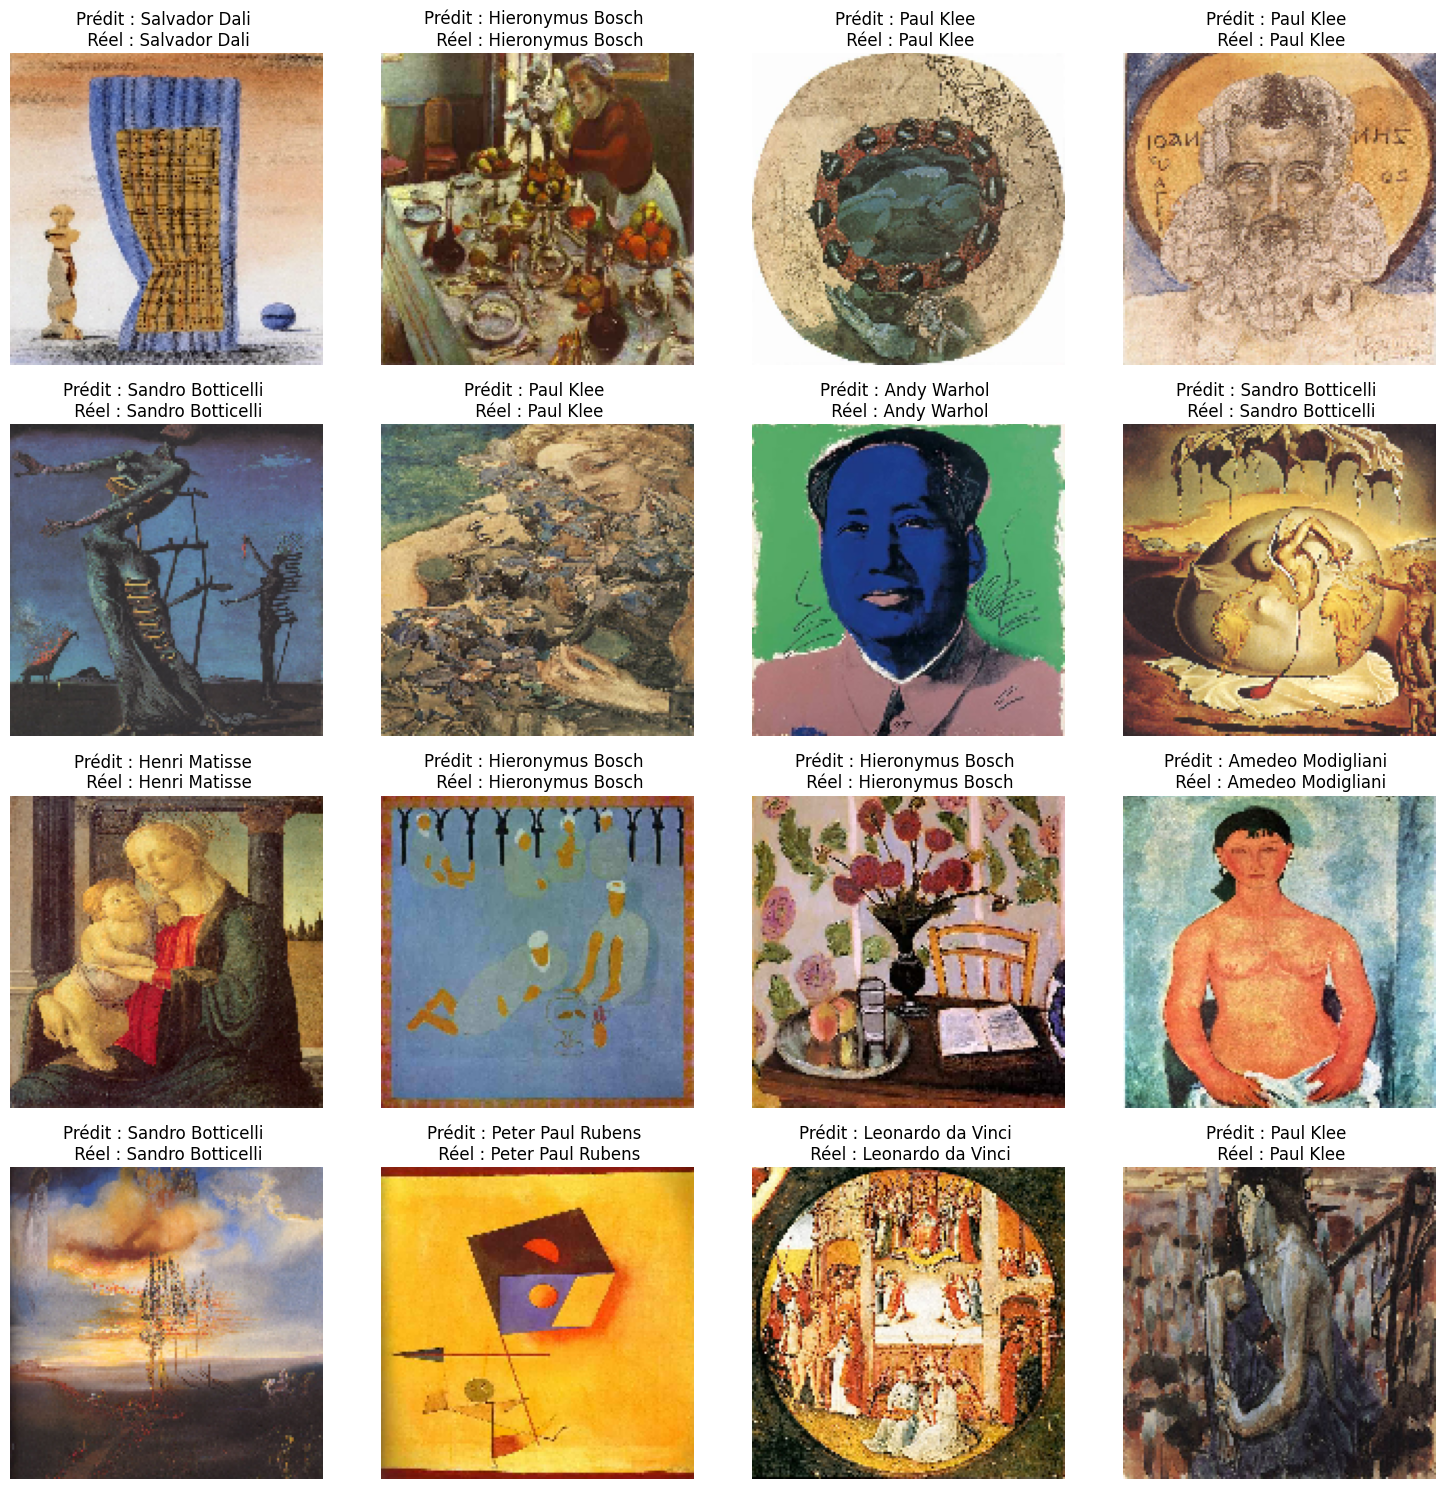

In [82]:
plt.figure(figsize=(15, 15))
num_images = 16

for i in range(num_images):
    plt.subplot(4, 4, i + 1)
    for x_batch, y_batch in train_generator:
        y_pred = vgg_combined.predict(x_batch)
        plt.imshow(x_batch[0])
        
        predicted_label_index = np.argmax(y_pred[0]) 
        true_label_index = np.argmax(y_batch[0])

        plt.title(f"Prédit : {labels.get(predicted_label_index)} \n Réel : {labels.get(true_label_index)}")
        plt.axis('off') 
        
        break 

plt.tight_layout()
plt.show()

# Conclusion

- On remarque que la précision du modèle diminue avec l'augmentation du nombre d'artiste. Suivant le critère de précision il est donc important d'adapter la base de données et de prendre un nombre d'artiste adéquat. 

- En utilisant un modèle initial simple et 10 époques, les différentes étapes nous permettent bien d'améliorer notre précision pour toutes les bases de données. Par exemple pour une base à 11 artistes, on passe d'un modèle inital à 45% de réussite à un modèle final à 70%.

- En regardant la base de données avec 11 artistes nous avons pu comparer un modèle initial simple avec un modèle plus complexe. Un modèle plus complexe nous permet d'avoir un résultat initial meilleur (50%) mais ne nous permet pas d'atteindre une précision de validation supérieur à 70%. Sur ce modèle l'ajout d'un VGG-16 avec data augmentation suffit. Alors que pour les modèles plus simples le fine tuning avec VGG et data augmentation permet de gagner 5% de précision en plus (passer de 65% à 70%).